In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset de Barcelona
data = pd.read_csv("Barcelona_España.csv")

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    50 non-null     int64  
 1   id                            50 non-null     int64  
 2   name                          50 non-null     object 
 3   description                   45 non-null     object 
 4   host_id                       50 non-null     int64  
 5   host_name                     50 non-null     object 
 6   host_since                    50 non-null     object 
 7   host_location                 49 non-null     object 
 8   host_response_time            44 non-null     object 
 9   host_response_rate            44 non-null     object 
 10  host_acceptance_rate          46 non-null     object 
 11  host_is_superhost             50 non-null     object 
 12  host_listings_count           50 non-null     int64  
 13  host_to

In [3]:
# Verificar valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                       0
id                               0
name                             0
description                      5
host_id                          0
host_name                        0
host_since                       0
host_location                    1
host_response_time               6
host_response_rate               6
host_acceptance_rate             4
host_is_superhost                0
host_listings_count              0
host_total_listings_count        0
host_verifications               0
host_has_profile_pic             0
host_identity_verified           0
neighbourhood                   16
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        2
bathrooms_text                   0
bedrooms                         1
beds                

**Procedimiento para eliminar valores nulos en DataFrame**

In [4]:
# Reemplazar valores nulos con 'bfill'
data1 = data.fillna(method="bfill")
data1.head()

C:\Users\ithan\AppData\Local\Temp\ipykernel_10172\3848243601.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 = data.fillna(method="bfill")


,Unnamed: 0,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_value
0,0,18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,71615,Mireia Maria,19/01/2010,"Barcelona, Spain",within an hour,96%,...,32,53,65,21/06/2025,48,6,2,4.30,4.53,4.28
1,1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,90417,Etain (Marnie),09/03/2010,"Catalonia, Spain",within an hour,100%,...,12,29,174,23/06/2025,88,10,1,4.82,4.90,4.68
2,2,32711,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,135703,Nick,31/05/2010,"Barcelona, Spain",within an hour,100%,...,12,31,39,22/06/2025,147,26,0,4.46,4.38,4.47
3,3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,73163,Andres,24/01/2010,"Barcelona, Spain",within an hour,80%,...,60,90,333,22/06/2025,25,9,0,4.36,4.55,4.23
4,4,347824,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,1447144,Acomodis Apartments,27/11/2011,"Barcelona, Spain",within an hour,87%,...,60,90,365,22/06/2025,3,0,0,4.00,4.00,4.00


In [5]:
# Corroboramos valores nulos después de la limpieza
valores_nulos = data1.isnull().sum()
valores_nulos

Unnamed: 0                      0
id                              0
name                            0
description                     0
host_id                         0
host_name                       0
host_since                      0
host_location                   0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   2
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bathrooms_text                  0
bedrooms                        0
beds                            0
amenities     

In [6]:
# Separación de cuantitativas y cualitativas
# ⚠️ Ajusta el rango de columnas numéricas según tu dataset
cuantitativas = data1.select_dtypes(include=[np.number])
cualitativas = data1.select_dtypes(exclude=[np.number])

cuantitativas.head()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_value
0,0,18674,71615,44,46,41.405560,2.17262,8,2.0,3.0,...,11,32,53,65,48,6,2,4.30,4.53,4.28
1,1,23197,90417,6,9,41.412432,2.21975,5,2.0,3.0,...,6,12,29,174,88,10,1,4.82,4.90,4.68
2,2,32711,135703,3,15,41.405660,2.17015,6,1.5,2.0,...,5,12,31,39,147,26,0,4.46,4.38,4.47
3,3,34241,73163,5,5,41.380620,2.17517,2,1.0,1.0,...,30,60,90,333,25,9,0,4.36,4.55,4.23
4,4,347824,1447144,356,565,41.376400,2.19102,3,1.0,1.0,...,30,60,90,365,3,0,0,4.00,4.00,4.00


<Figure size 1500x800 with 0 Axes>

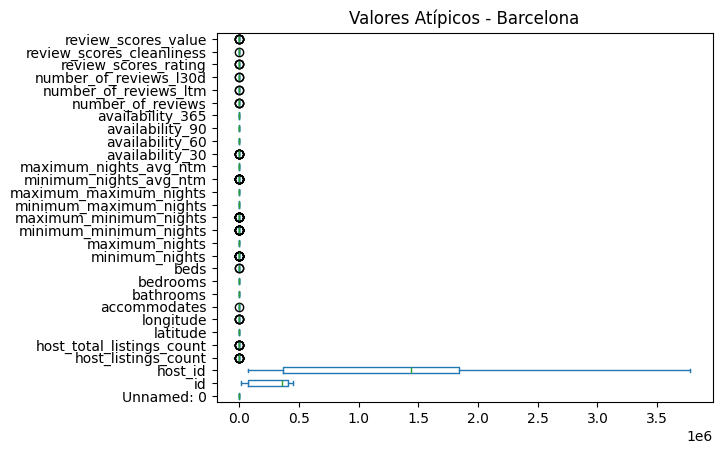

In [7]:
# Boxplot de variables cuantitativas
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos - Barcelona")
plt.show()

**Procedimiento: Desviación Estándar para eliminar outliers**

In [8]:
# Definimos límites con desviación estándar
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Límite superior permitido:\n", Limite_Superior)
print("Límite inferior permitido:\n", Limite_Inferior)

Límite superior permitido:
 Unnamed: 0                   6.823214e+01
id                           7.798399e+05
host_id                      3.812990e+06
host_listings_count          3.598745e+02
host_total_listings_count    5.707503e+02
latitude                     4.143024e+01
longitude                    2.221189e+00
accommodates                 1.113282e+01
bathrooms                    3.655023e+00
bedrooms                     4.851201e+00
beds                         1.036384e+01
minimum_nights               4.669141e+01
maximum_nights               1.782584e+03
minimum_minimum_nights       4.548257e+01
maximum_minimum_nights       4.594209e+01
minimum_maximum_nights       2.069536e+03
maximum_maximum_nights       2.059261e+03
minimum_nights_avg_ntm       4.610952e+01
maximum_nights_avg_ntm       2.041909e+03
availability_30              4.105316e+01
availability_60              8.587491e+01
availability_90              1.311227e+02
availability_365             5.499618e+02
number

In [9]:
# Sustituimos outliers por NaN
data3 = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
data3.head()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_value
0,0,18674,71615,44,46,41.405560,2.17262,8.0,2.0,3.0,...,11,32,53,65,48.0,6.0,2.0,4.30,4.53,4.28
1,1,23197,90417,6,9,41.412432,2.21975,5.0,2.0,3.0,...,6,12,29,174,88.0,10.0,1.0,4.82,4.90,4.68
2,2,32711,135703,3,15,41.405660,2.17015,6.0,1.5,2.0,...,5,12,31,39,147.0,26.0,0.0,4.46,4.38,4.47
3,3,34241,73163,5,5,41.380620,2.17517,2.0,1.0,1.0,...,30,60,90,333,25.0,9.0,0.0,4.36,4.55,4.23
4,4,347824,1447144,356,565,41.376400,2.19102,3.0,1.0,1.0,...,30,60,90,365,3.0,0.0,0.0,4.00,4.00,4.00


In [10]:
# Verificar nulos generados por outliers
valores_nulos = data3.isnull().sum()
valores_nulos

Unnamed: 0                   0
id                           0
host_id                      0
host_listings_count          0
host_total_listings_count    0
latitude                     0
longitude                    0
accommodates                 1
bathrooms                    0
bedrooms                     0
beds                         1
minimum_nights               0
maximum_nights               0
minimum_minimum_nights       0
maximum_minimum_nights       0
minimum_maximum_nights       0
maximum_maximum_nights       0
minimum_nights_avg_ntm       0
maximum_nights_avg_ntm       0
availability_30              0
availability_60              0
availability_90              0
availability_365             0
number_of_reviews            1
number_of_reviews_ltm        1
number_of_reviews_l30d       1
review_scores_rating         1
review_scores_cleanliness    1
review_scores_value          0
dtype: int64

In [11]:
# Reemplazamos outliers (nulos) con la media
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 1))
data_clean.head()

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_value
0,0,18674,71615,44,46,41.405560,2.17262,8.0,2.0,3.0,...,11,32,53,65,48.0,6.0,2.0,4.30,4.53,4.28
1,1,23197,90417,6,9,41.412432,2.21975,5.0,2.0,3.0,...,6,12,29,174,88.0,10.0,1.0,4.82,4.90,4.68
2,2,32711,135703,3,15,41.405660,2.17015,6.0,1.5,2.0,...,5,12,31,39,147.0,26.0,0.0,4.46,4.38,4.47
3,3,34241,73163,5,5,41.380620,2.17517,2.0,1.0,1.0,...,30,60,90,333,25.0,9.0,0.0,4.36,4.55,4.23
4,4,347824,1447144,356,565,41.376400,2.19102,3.0,1.0,1.0,...,30,60,90,365,3.0,0.0,0.0,4.00,4.00,4.00
